In [337]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your EV dataset
# Replace 'your_dataset.csv' with the actual file path or URL
df = pd.read_csv('/content/EV_India.csv')

In [338]:
# Display the first few rows of the dataset
print(df.head())

   Sr. No.                State Name Total Electric Vehicle  \
0        1  Andaman & Nicobar Island                    162   
1        2             Andra Pradesh                    NaN   
2        3         Arunachal Pradesh                     20   
3        4                     Assam                  64766   
4        5                     Bihar                  83335   

  Total Non-Electric Vehicle        Total  
0                   1,46,945     1,47,107  
1                        NaN          NaN  
2                   2,52,965     2,52,985  
3                  46,77,053    47,41,819  
4                1,04,07,078  1,04,90,413  


In [339]:
# Summary statistics
print(df.describe())

         Sr. No.
count  36.000000
mean   18.500000
std    10.535654
min     1.000000
25%     9.750000
50%    18.500000
75%    27.250000
max    36.000000


In [340]:
# Check for missing values
print(df.isnull().sum())

Sr. No.                       0
State Name                    0
Total Electric Vehicle        4
Total Non-Electric Vehicle    4
Total                         4
dtype: int64


In [341]:
print("Missing values before cleaning:")
print(df.isnull().sum())

# Handle missing values
# Example: Drop rows with missing values, you can choose other strategies based on your dataset
df = df.dropna()

# Display the number of missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())

# Handling outliers using z-score
from scipy.stats import zscore
z_scores = zscore(df.select_dtypes(include=['float64']))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

# Display the shape of the dataset after handling outliers
print("\nShape after handling outliers:")
print(df.shape)

Missing values before cleaning:
Sr. No.                       0
State Name                    0
Total Electric Vehicle        4
Total Non-Electric Vehicle    4
Total                         4
dtype: int64

Missing values after handling:
Sr. No.                       0
State Name                    0
Total Electric Vehicle        0
Total Non-Electric Vehicle    0
Total                         0
dtype: int64

Shape after handling outliers:
(32, 5)


In [342]:
display(df.columns)

Index(['Sr. No.', 'State Name', 'Total Electric Vehicle',
       'Total Non-Electric Vehicle', 'Total'],
      dtype='object')

In [343]:
# Display the DataFrame before dropping 'Sr. No.'
print("DataFrame before dropping 'Sr. No.':")
print(df.head())

# Drop 'Sr. No.' column
df = df.drop('Sr. No.', axis=1)

# Display the DataFrame after dropping 'Sr. No.'
print("\nDataFrame after dropping 'Sr. No.':")
print(df.head())

DataFrame before dropping 'Sr. No.':
   Sr. No.                State Name Total Electric Vehicle  \
0        1  Andaman & Nicobar Island                    162   
2        3         Arunachal Pradesh                     20   
3        4                     Assam                  64766   
4        5                     Bihar                  83335   
5        6                Chandigarh                   2812   

  Total Non-Electric Vehicle        Total  
0                   1,46,945     1,47,107  
2                   2,52,965     2,52,985  
3                  46,77,053    47,41,819  
4                1,04,07,078  1,04,90,413  
5                   7,46,881     7,49,693  

DataFrame after dropping 'Sr. No.':
                 State Name Total Electric Vehicle Total Non-Electric Vehicle  \
0  Andaman & Nicobar Island                    162                   1,46,945   
2         Arunachal Pradesh                     20                   2,52,965   
3                     Assam             

In [344]:
display(df)

,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
2,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,Assam,64766,"46,77,053","47,41,819"
4,Bihar,83335,"1,04,07,078","1,04,90,413"
5,Chandigarh,2812,"7,46,881","7,49,693"
6,Chhattisgarh,20966,"68,36,200","68,57,166"
7,Delhi,"1,56,393","76,85,600","78,41,993"
8,Goa,3870,"10,71,570","10,75,440"
9,Gujarat,45272,"2,06,05,484","2,06,50,756"
10,Haryana,37035,"1,07,78,270","1,08,15,305"


In [345]:
# Display columns with commas in numeric values
columns_with_commas = []

for column in df.columns:
    if df[column].dtype == 'object' and any(df[column].str.contains(',')):
        columns_with_commas.append(column)

print("Columns with Commas in Numeric Values:\n", columns_with_commas)


Columns with Commas in Numeric Values:
 ['Total Electric Vehicle', 'Total Non-Electric Vehicle', 'Total']


In [346]:
display(df)

,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
2,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,Assam,64766,"46,77,053","47,41,819"
4,Bihar,83335,"1,04,07,078","1,04,90,413"
5,Chandigarh,2812,"7,46,881","7,49,693"
6,Chhattisgarh,20966,"68,36,200","68,57,166"
7,Delhi,"1,56,393","76,85,600","78,41,993"
8,Goa,3870,"10,71,570","10,75,440"
9,Gujarat,45272,"2,06,05,484","2,06,50,756"
10,Haryana,37035,"1,07,78,270","1,08,15,305"


In [347]:

# Display the df types of each column
print("Data Types Before Correction:\n", df.dtypes)

# List of columns containing numeric values with commas to be converted
columns_with_commas = ["Total Electric Vehicle", "Total Non-Electric Vehicle", "Total"]

# Convert columns with commas to numeric format
df[columns_with_commas] = df[columns_with_commas].replace({',': ''}, regex=True).astype(float)

# Display the updated df types
print("\nData Types After Conversion:\n", df.dtypes)

# Display the updated dataset
print("\nUpdated Dataset:\n", df.head())

Data Types Before Correction:
 State Name                    object
Total Electric Vehicle        object
Total Non-Electric Vehicle    object
Total                         object
dtype: object

Data Types After Conversion:
 State Name                     object
Total Electric Vehicle        float64
Total Non-Electric Vehicle    float64
Total                         float64
dtype: object

Updated Dataset:
                  State Name  Total Electric Vehicle  \
0  Andaman & Nicobar Island                   162.0   
2         Arunachal Pradesh                    20.0   
3                     Assam                 64766.0   
4                     Bihar                 83335.0   
5                Chandigarh                  2812.0   

   Total Non-Electric Vehicle       Total  
0                    146945.0    147107.0  
2                    252965.0    252985.0  
3                   4677053.0   4741819.0  
4                  10407078.0  10490413.0  
5                    746881.0    749693.

In [348]:
print(df.columns)

Index(['State Name', 'Total Electric Vehicle', 'Total Non-Electric Vehicle',
       'Total'],
      dtype='object')


In [349]:
print(df.head())

                 State Name  Total Electric Vehicle  \
0  Andaman & Nicobar Island                   162.0   
2         Arunachal Pradesh                    20.0   
3                     Assam                 64766.0   
4                     Bihar                 83335.0   
5                Chandigarh                  2812.0   

   Total Non-Electric Vehicle       Total  
0                    146945.0    147107.0  
2                    252965.0    252985.0  
3                   4677053.0   4741819.0  
4                  10407078.0  10490413.0  
5                    746881.0    749693.0  


In [350]:
display(df)

,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,Andaman & Nicobar Island,162.0,146945.0,147107.0
2,Arunachal Pradesh,20.0,252965.0,252985.0
3,Assam,64766.0,4677053.0,4741819.0
4,Bihar,83335.0,10407078.0,10490413.0
5,Chandigarh,2812.0,746881.0,749693.0
6,Chhattisgarh,20966.0,6836200.0,6857166.0
7,Delhi,156393.0,7685600.0,7841993.0
8,Goa,3870.0,1071570.0,1075440.0
9,Gujarat,45272.0,20605484.0,20650756.0
10,Haryana,37035.0,10778270.0,10815305.0


In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-352-fa6ad3c4b684>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


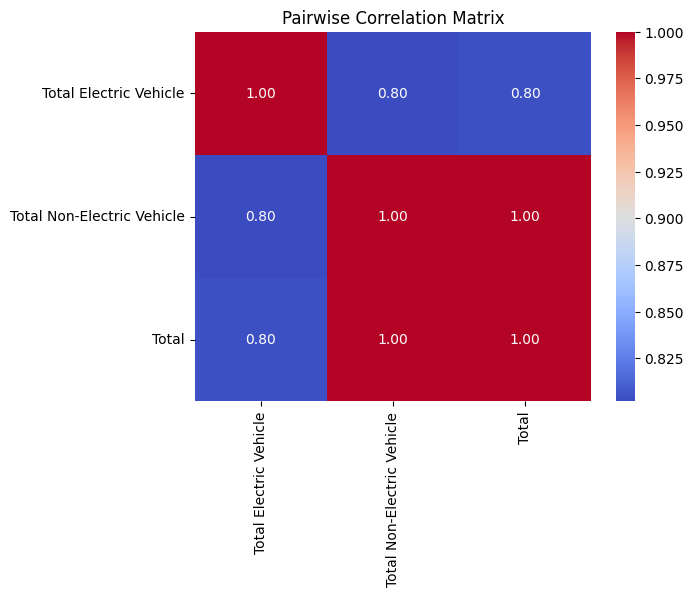

In [352]:
# Pairwise correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Matrix')
plt.show()


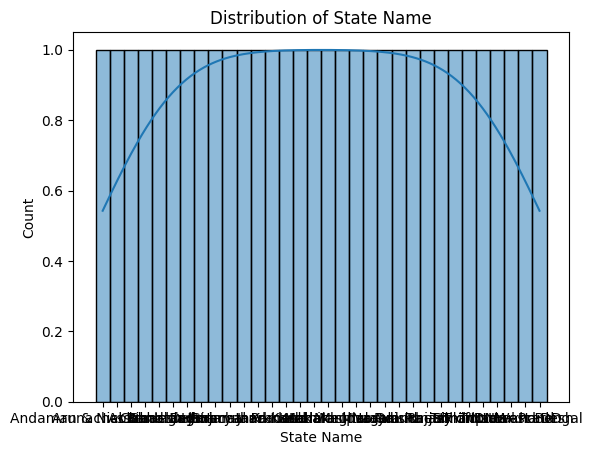

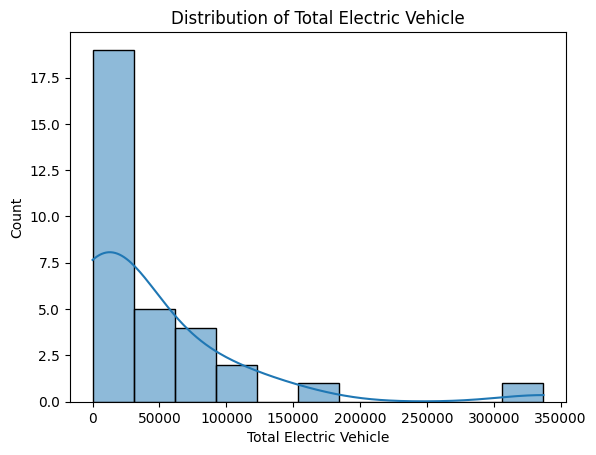

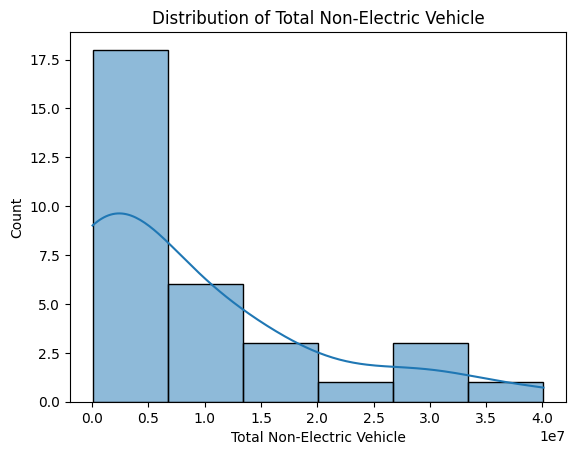

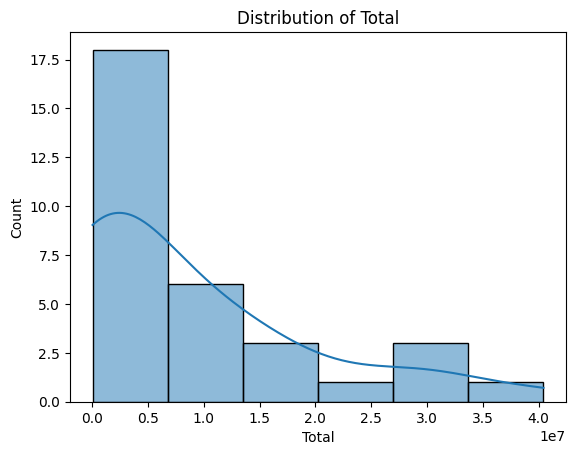

In [353]:
# Univariate distribution plots
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

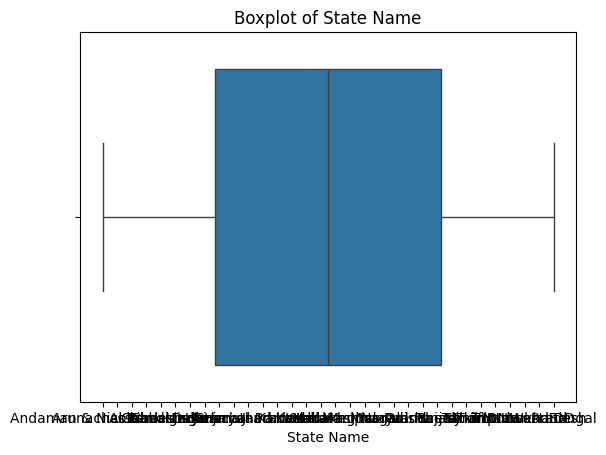

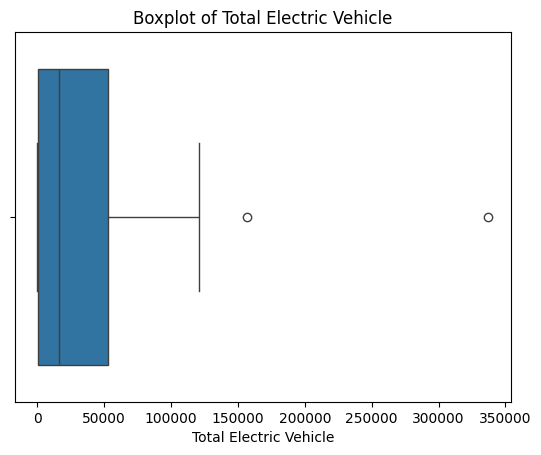

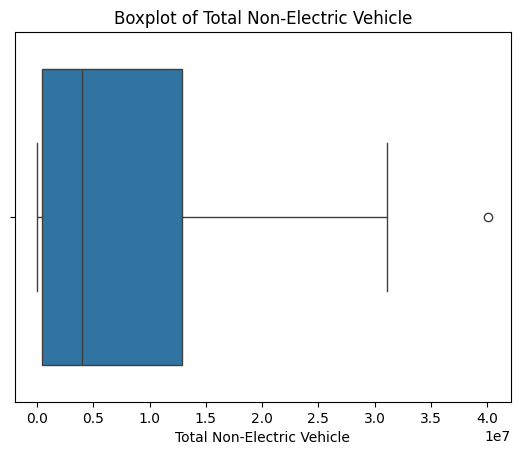

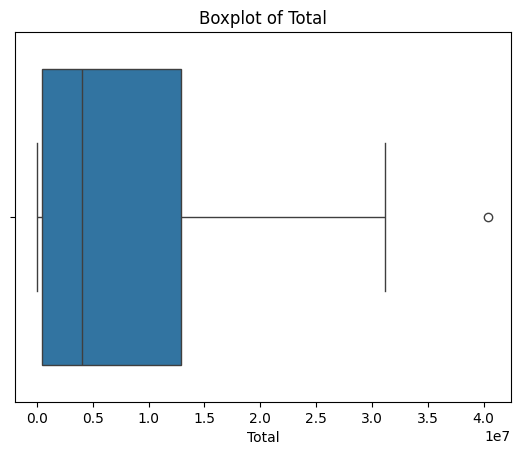

In [354]:
# Box plots for outliers
for column in df.columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

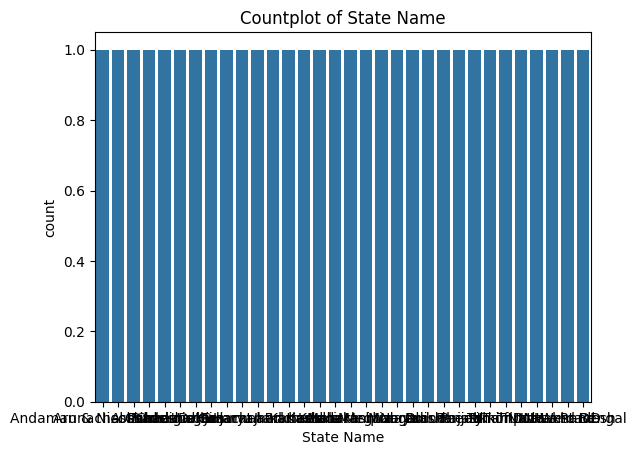

In [355]:
# Categorical variable analysis
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    sns.countplot(x=df[column])
    plt.title(f'Countplot of {column}')
    plt.show()

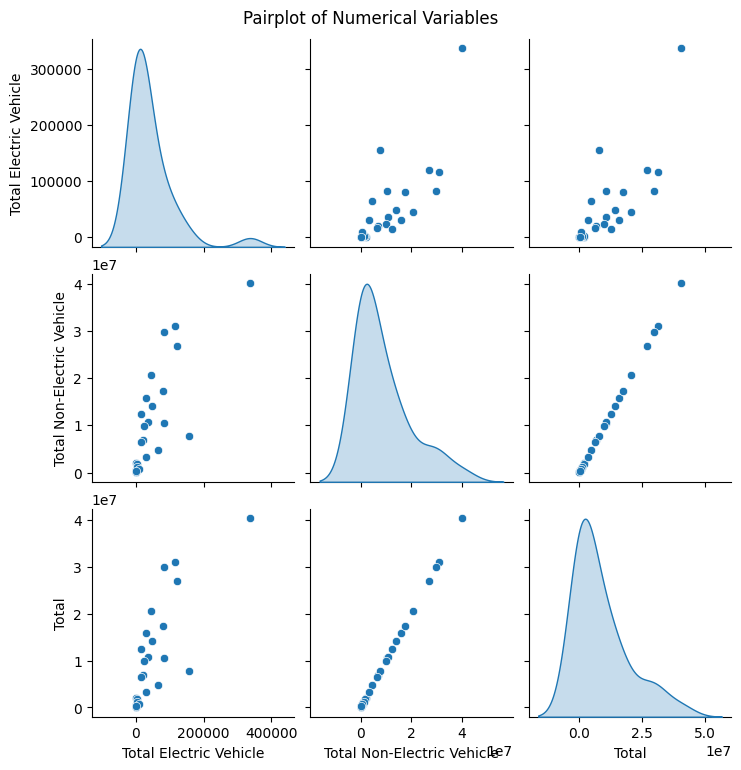

In [356]:
# Scatter plots for numerical variables
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

In [357]:
print(df.dtypes)

State Name                     object
Total Electric Vehicle        float64
Total Non-Electric Vehicle    float64
Total                         float64
dtype: object


In [358]:
print(df.columns)
print(df.head())

Index(['State Name', 'Total Electric Vehicle', 'Total Non-Electric Vehicle',
       'Total'],
      dtype='object')
                 State Name  Total Electric Vehicle  \
0  Andaman & Nicobar Island                   162.0   
2         Arunachal Pradesh                    20.0   
3                     Assam                 64766.0   
4                     Bihar                 83335.0   
5                Chandigarh                  2812.0   

   Total Non-Electric Vehicle       Total  
0                    146945.0    147107.0  
2                    252965.0    252985.0  
3                   4677053.0   4741819.0  
4                  10407078.0  10490413.0  
5                    746881.0    749693.0  


Which states have the highest adoption of electric vehicles?

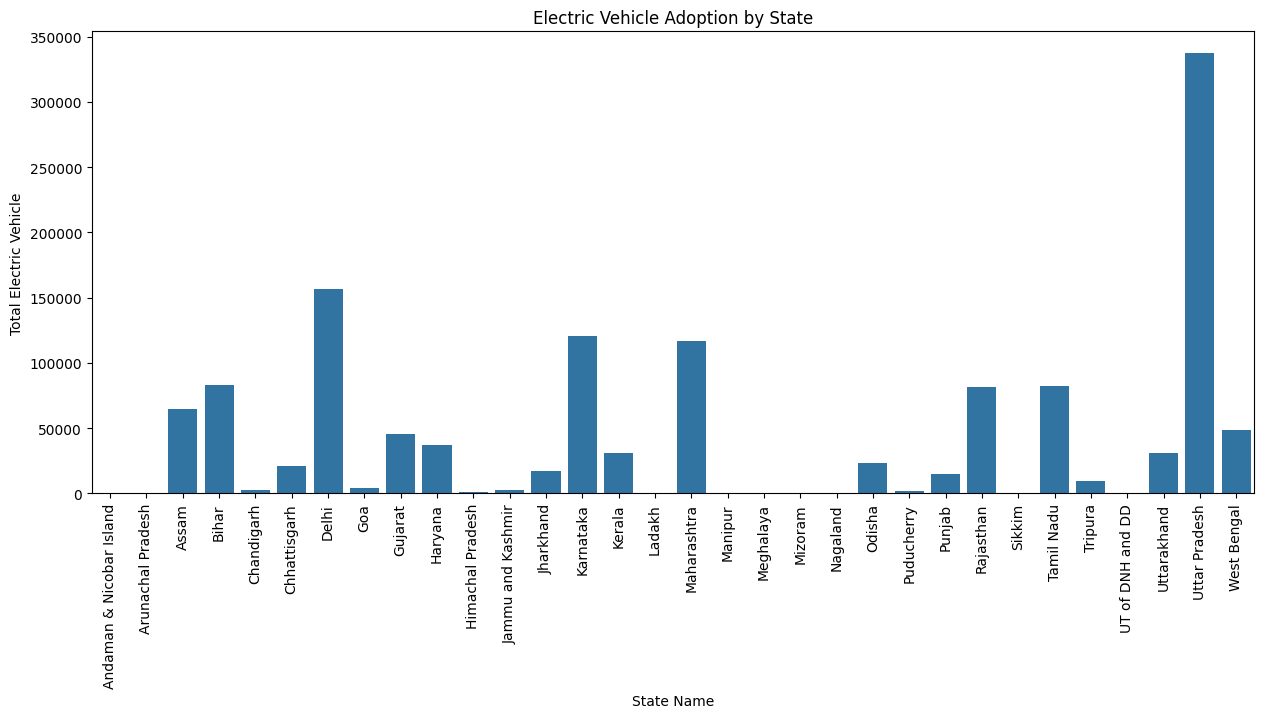

In [359]:
# Bar chart for total electric vehicles in each state
plt.figure(figsize=(15, 6))
sns.barplot(x='State Name', y='Total Electric Vehicle', data=df)
plt.title('Electric Vehicle Adoption by State')
plt.xticks(rotation=90)
plt.show()

What is the distribution of non-electric vehicles in each state?

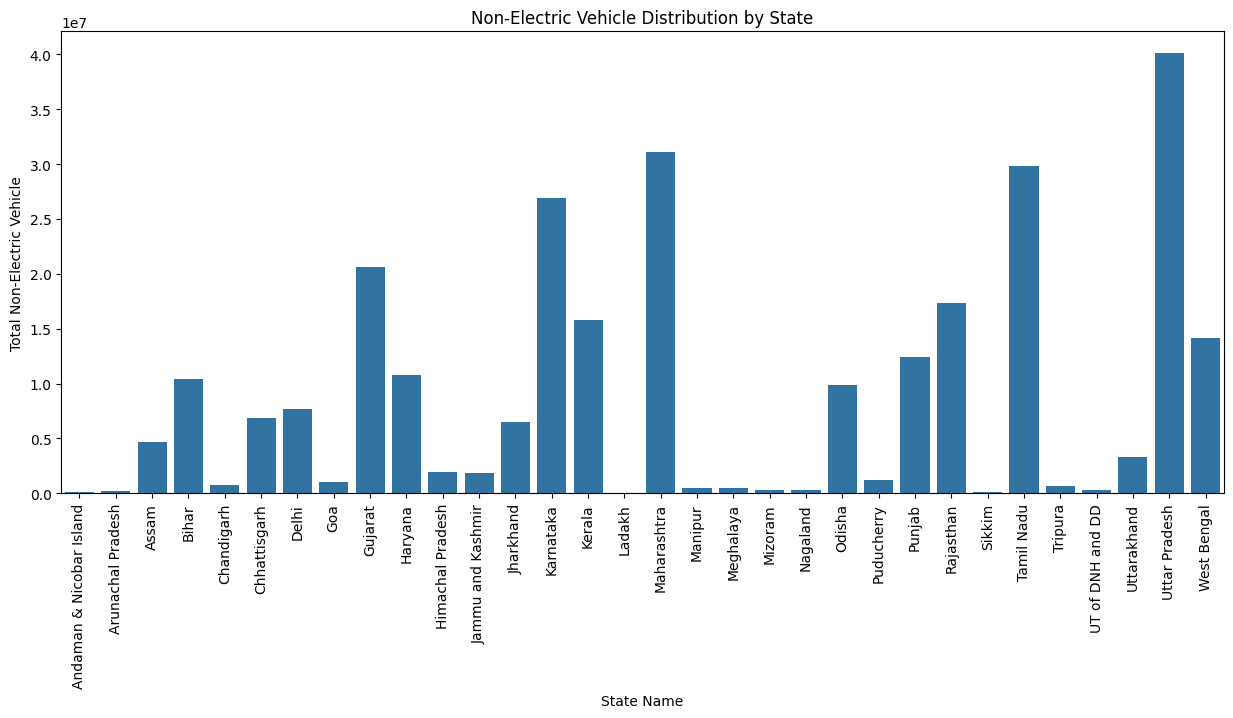

In [360]:
# Bar chart for total non-electric vehicles in each state
plt.figure(figsize=(15, 6))
sns.barplot(x='State Name', y='Total Non-Electric Vehicle', data=df)
plt.title('Non-Electric Vehicle Distribution by State')
plt.xticks(rotation=90)
plt.show()


How does the total vehicle count vary across different states?

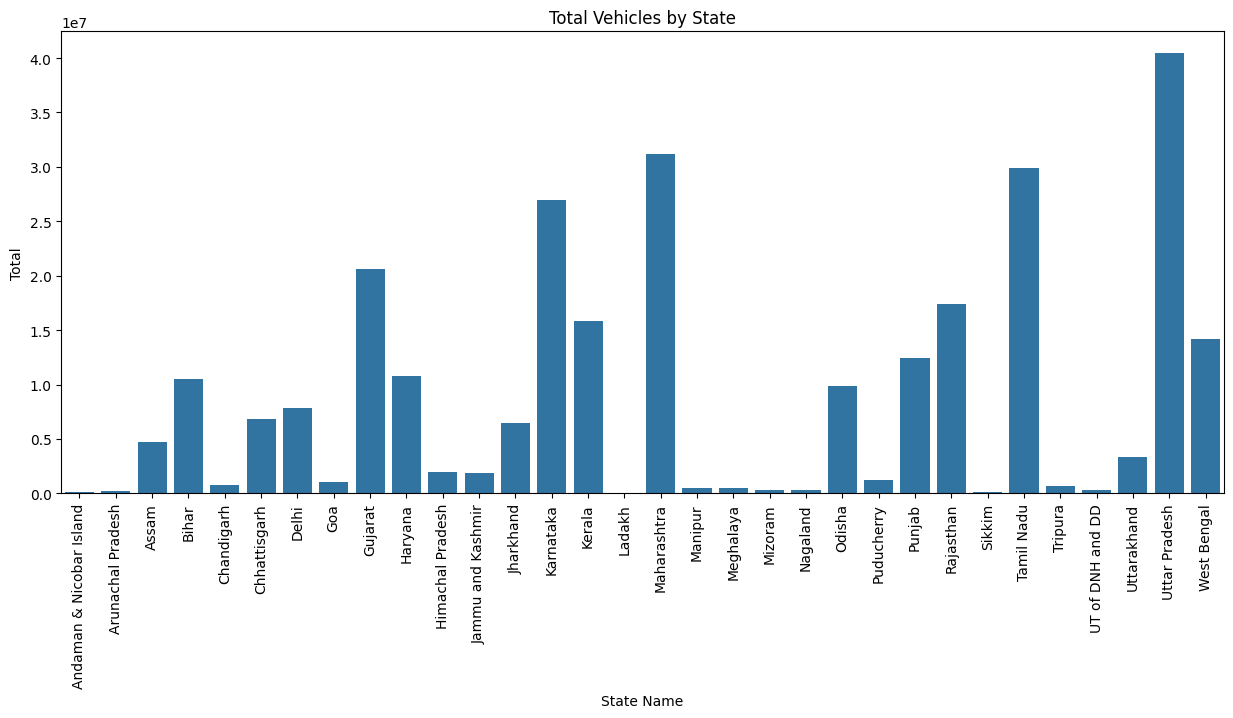

In [361]:
# Bar chart for total vehicles in each state
plt.figure(figsize=(15, 6))
sns.barplot(x='State Name', y='Total', data=df)
plt.title('Total Vehicles by State')
plt.xticks(rotation=90)
plt.show()


Are there states where the ratio of electric vehicles to non-electric vehicles is particularly high?

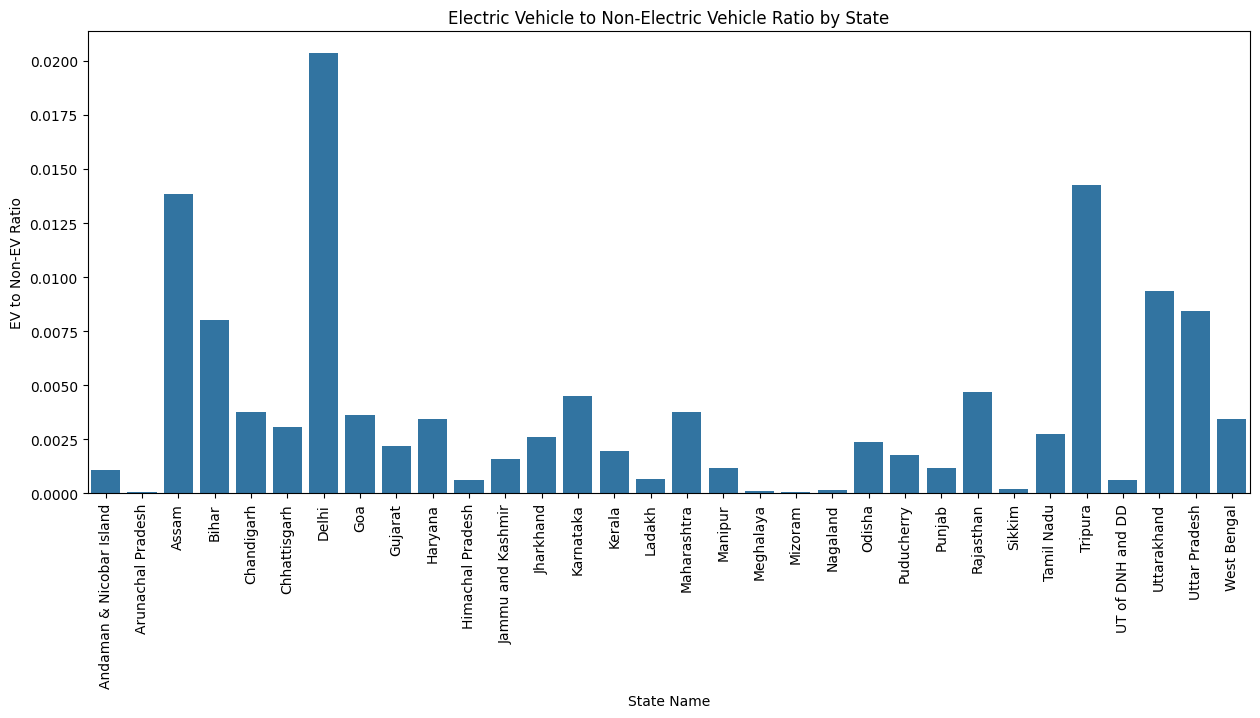

In [362]:
# Calculate the ratio of electric vehicles to non-electric vehicles
df['EV to Non-EV Ratio'] = df['Total Electric Vehicle'] / df['Total Non-Electric Vehicle']
plt.figure(figsize=(15, 6))
# Bar chart for the ratio in each state
sns.barplot(x='State Name', y='EV to Non-EV Ratio', data=df)
plt.title('Electric Vehicle to Non-Electric Vehicle Ratio by State')
plt.xticks(rotation=90)
plt.show()


Is there a correlation between the total number of electric vehicles and non-electric vehicles in a state?

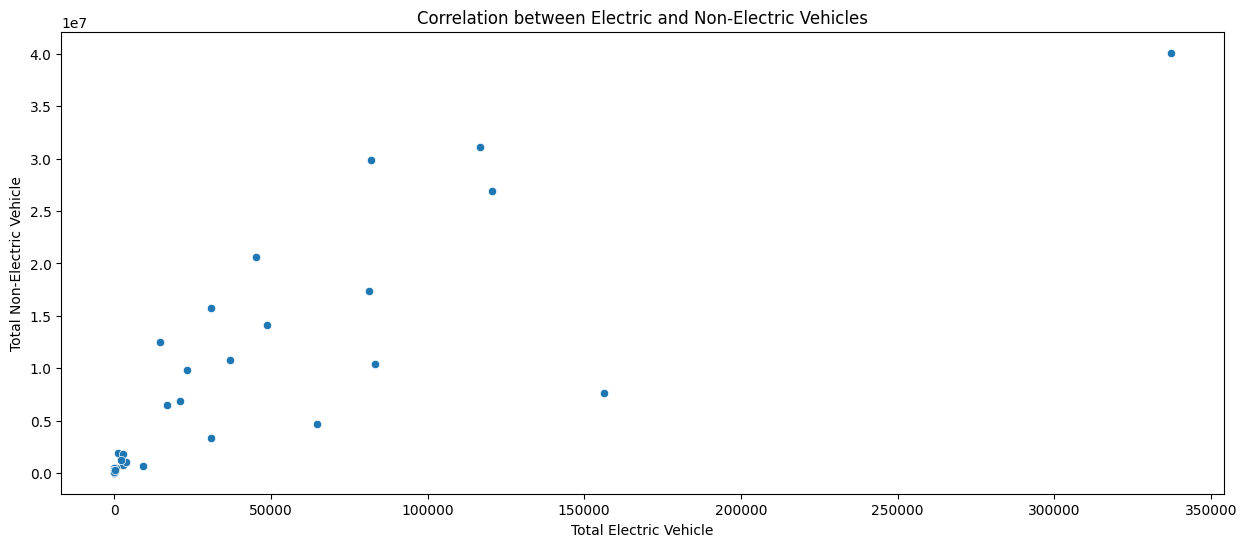

In [363]:
# Scatter plot for correlation
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Total Electric Vehicle', y='Total Non-Electric Vehicle', data=df)
plt.title('Correlation between Electric and Non-Electric Vehicles')
plt.show()


In [364]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [365]:
"""`Principal Component Analysis`"""

# Extracting features for PCA
X = df[['Total Electric Vehicle', 'Total Non-Electric Vehicle', 'Total']]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
# Printing principal components
print("Principal Components:")
print(pca.components_)

Explained Variance Ratio: [0.91361758 0.08638242]
Principal Components:
[[ 0.54637691  0.59200639  0.59245312]
 [ 0.83752753 -0.38996407 -0.38272139]]


In [323]:
pip install kneed

In [366]:
from kneed import KneeLocator

In [367]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []  # wcss: within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

In [368]:
# Use KneeLocator to find the optimal number of clusters
knee_locator = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

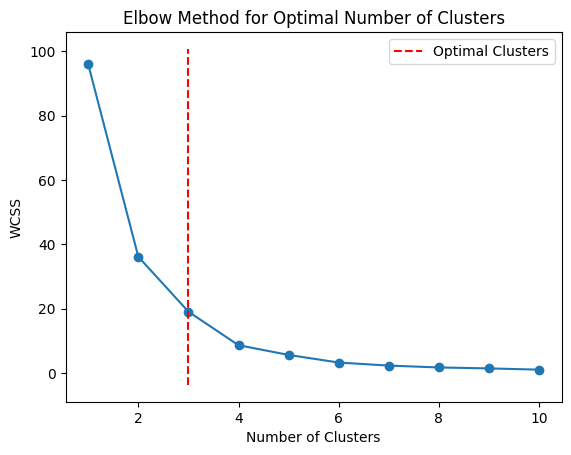

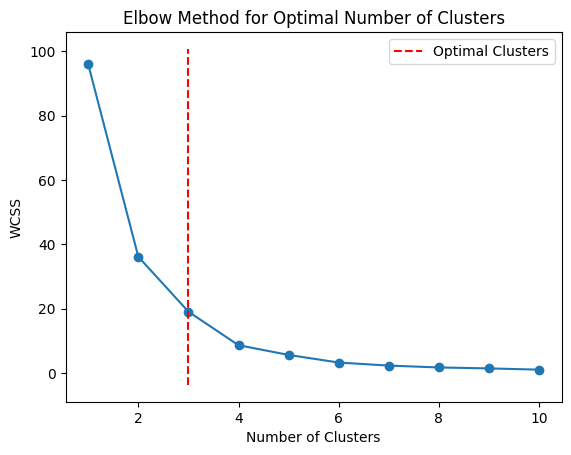

In [369]:
# Plot the Elbow method with the optimal number of clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.vlines(optimal_clusters, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Optimal Clusters')
plt.legend()
plt.show()

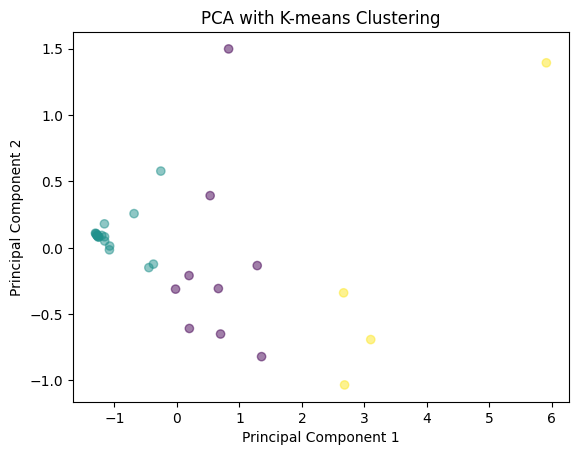

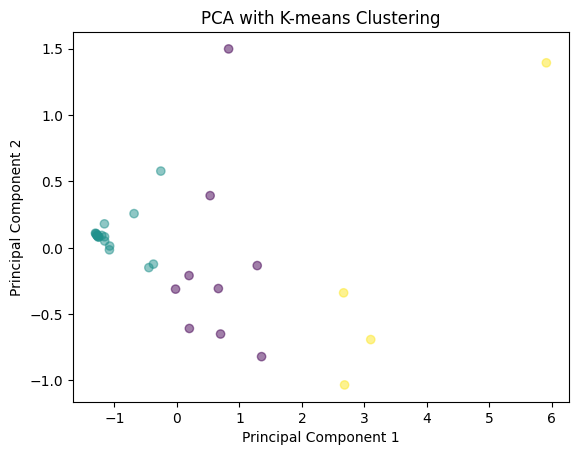

In [370]:
# Applying K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Segment'] = kmeans.fit_predict(X_pca)

# Visualizing the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Segment'], cmap='viridis', marker='o', alpha=0.5)
plt.title('PCA with K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [371]:
# Display the count of samples in each cluster
print(df['Segment'].value_counts())

1    19
0     9
2     4
Name: Segment, dtype: int64
1    19
0     9
2     4
Name: Segment, dtype: int64


In [372]:
# Print details for each cluster
numeric_columns = ['Total Electric Vehicle', 'Total Non-Electric Vehicle', 'Total']
cluster_details = df.groupby('Segment')[numeric_columns].mean()

# Display the details for each cluster
print(cluster_details)


         Total Electric Vehicle  Total Non-Electric Vehicle         Total
Segment                                                                  
0                  57898.888889                1.322446e+07  1.328236e+07
1                   8257.157895                1.646595e+06  1.654852e+06
2                 164102.250000                3.196604e+07  3.213014e+07
         Total Electric Vehicle  Total Non-Electric Vehicle         Total
Segment                                                                  
0                  57898.888889                1.322446e+07  1.328236e+07
1                   8257.157895                1.646595e+06  1.654852e+06
2                 164102.250000                3.196604e+07  3.213014e+07


What are the key characteristics of each market segment?


In [373]:
# Display summary statistics for each cluster
segment_statistics = df.groupby('Segment').describe()
print(segment_statistics)


        Total Electric Vehicle                                         \
                         count           mean            std      min   
Segment                                                                 
0                          9.0   57898.888889   43818.744686  14804.0   
1                         19.0    8257.157895   16170.290437     20.0   
2                          4.0  164102.250000  116674.443818  82051.0   

                                                 Total Non-Electric Vehicle  \
               25%       50%       75%       max                      count   
Segment                                                                       
0         30775.00   45272.0   81338.0  156393.0                        9.0   
1            53.50    1175.0    6566.0   64766.0                       19.0   
2        107997.25  118589.0  174694.0  337180.0                        4.0   

                       ...       Total             EV to Non-EV Ratio  \
             

What is the distribution of clusters across different states?

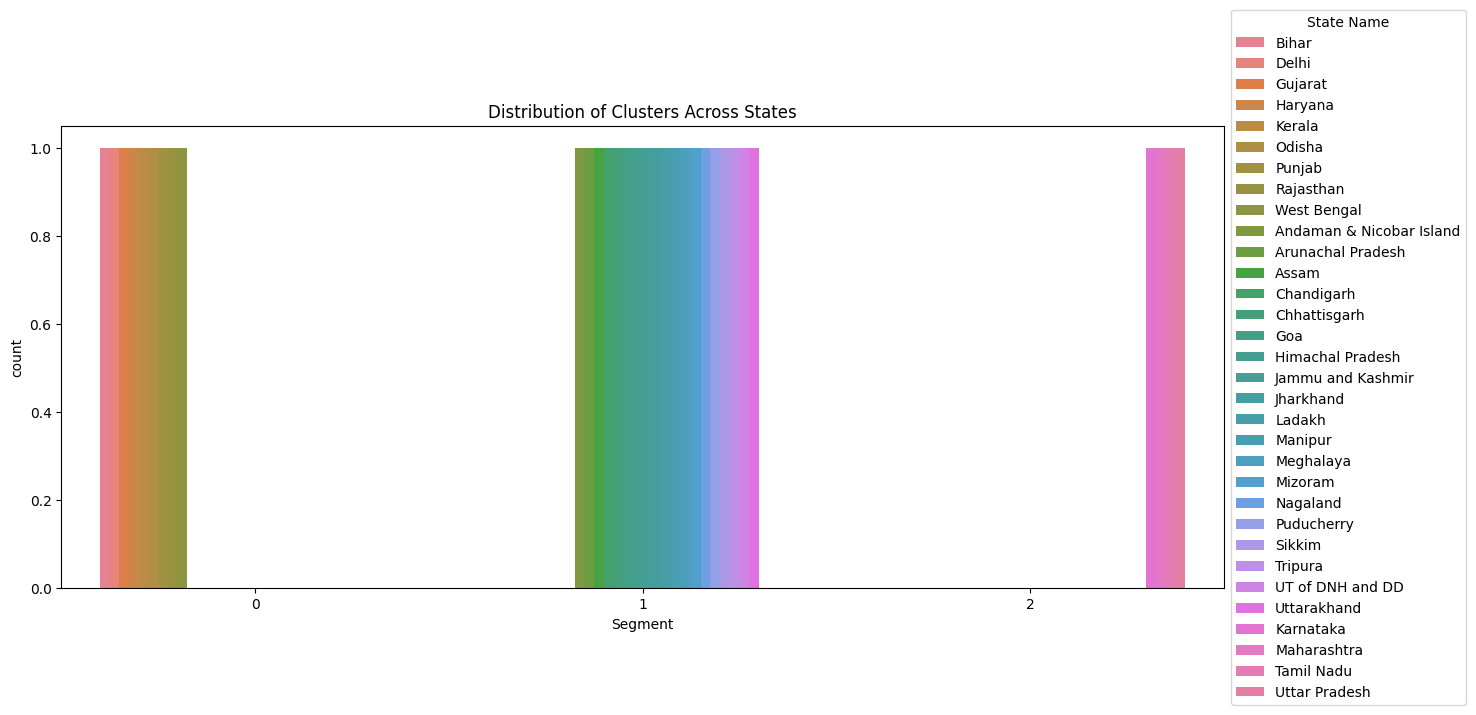

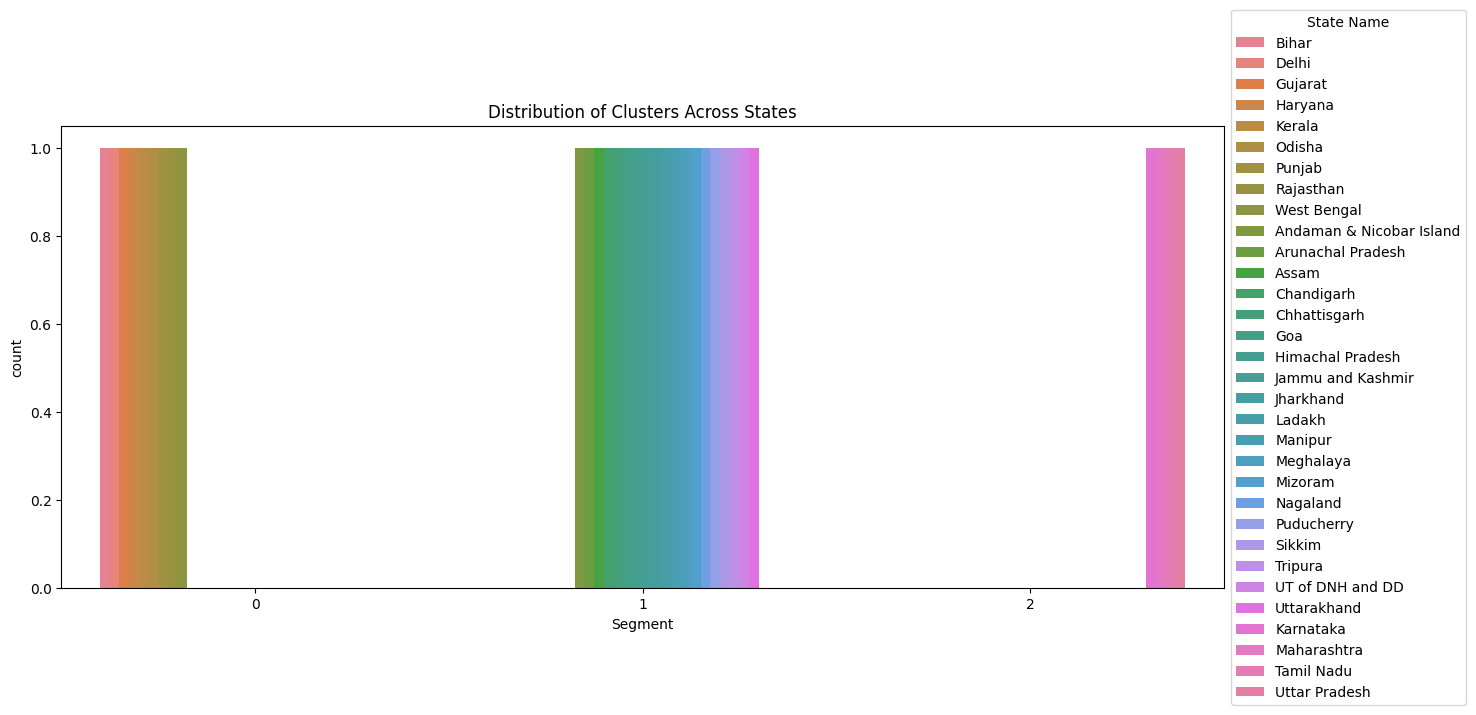

In [374]:
# Countplot of clusters in each state
plt.figure(figsize=(15, 6))
sns.countplot(x='Segment', hue='State Name', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='State Name')
plt.title('Distribution of Clusters Across States')
plt.show()


Are there specific states that predominantly belong to a particular cluster?

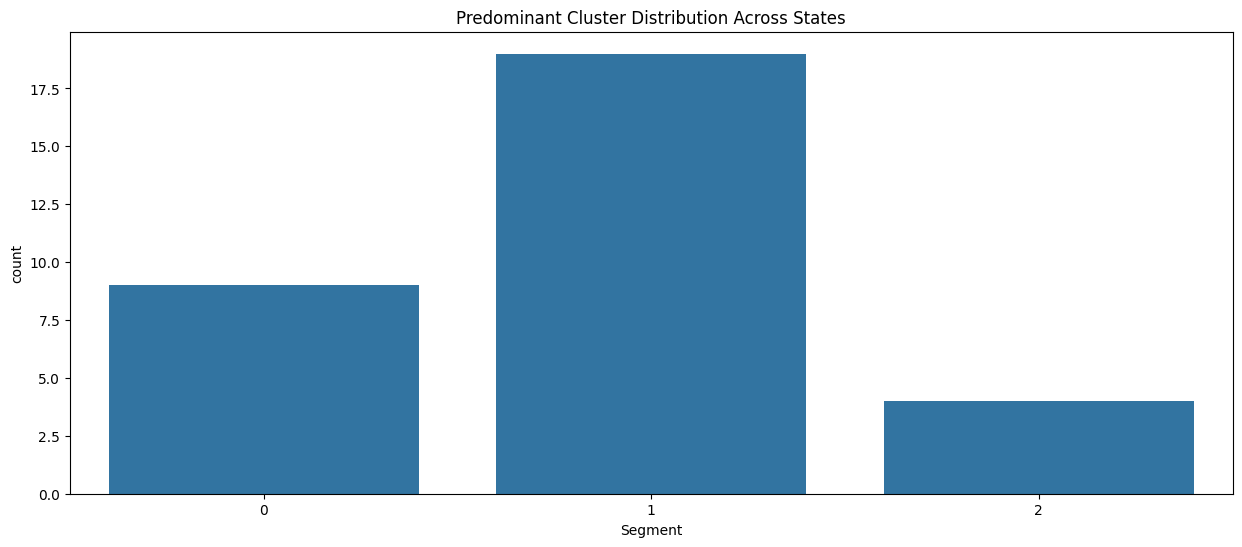

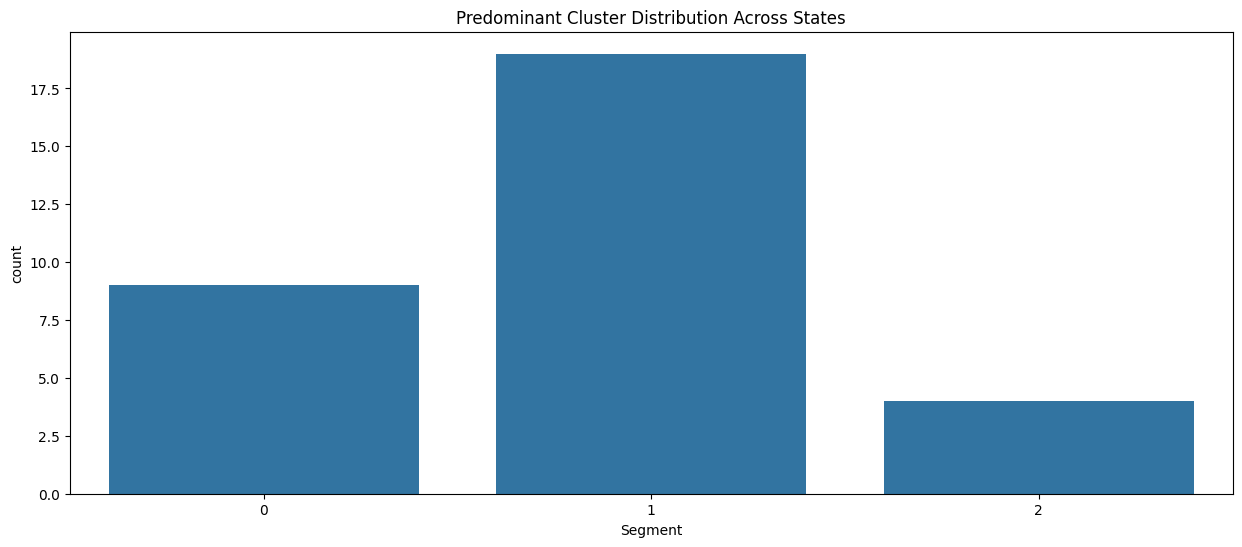

In [375]:
# Countplot of the predominant cluster in each state
plt.figure(figsize=(15, 6))
predominant_clusters = df.groupby('State Name')['Segment'].agg(lambda x: x.value_counts().index[0])
sns.countplot(x=predominant_clusters, data=df)
plt.title('Predominant Cluster Distribution Across States')
plt.show()


How do the total vehicle counts differ among the clusters?

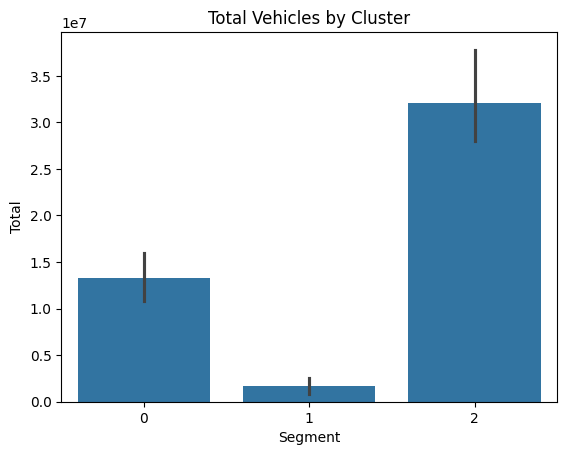

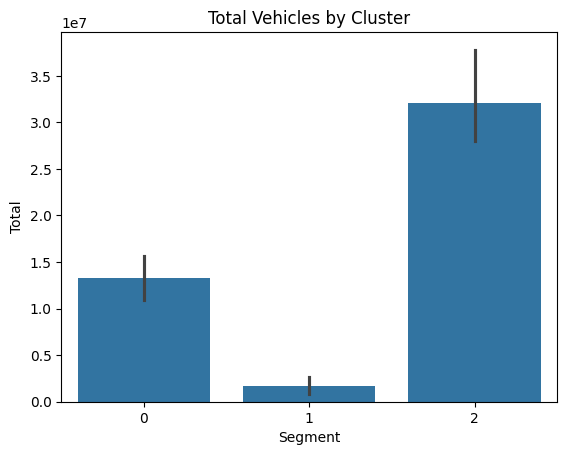

In [376]:
# Bar chart for total vehicles in each cluster
sns.barplot(x='Segment', y='Total', data=df)
plt.title('Total Vehicles by Cluster')
plt.show()

Is there a correlation between the total number of electric vehicles and non-electric vehicles within each cluster?

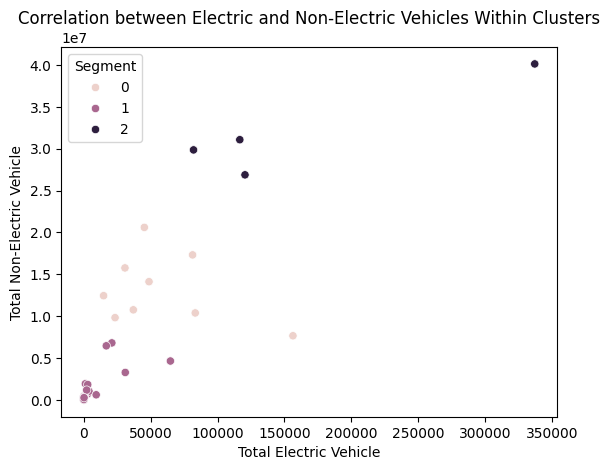

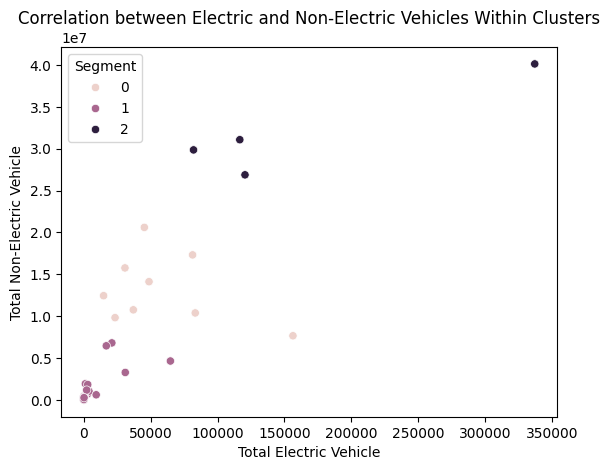

In [377]:
# Scatter plot for correlation within each cluster
sns.scatterplot(x='Total Electric Vehicle', y='Total Non-Electric Vehicle', hue='Segment', data=df)
plt.title('Correlation between Electric and Non-Electric Vehicles Within Clusters')
plt.show()


In [378]:
import pandas as pd

# Assuming you have a DataFrame with Segment labels and other relevant columns
# Replace 'your_dataframe' with your actual DataFrame

# Profile each Segment by calculating mean and standard deviation for key variables
Segment_profiles = df.groupby('Segment').agg({'Total Electric Vehicle': ['mean', 'std'],
                                              'Total Non-Electric Vehicle': ['mean', 'std'],
                                              'Total': ['mean', 'std']}).reset_index()

# Rename the columns for clarity
Segment_profiles.columns = ['Segment',
                             'Avg Electric Vehicles', 'Std Electric Vehicles',
                             'Avg Non-Electric Vehicles', 'Std Non-Electric Vehicles',
                             'Avg Total Vehicles', 'Std Total Vehicles']

# Display the Segment profiles
print(Segment_profiles)


   Segment  Avg Electric Vehicles  Std Electric Vehicles  \
0        0           57898.888889           43818.744686   
1        1            8257.157895           16170.290437   
2        2          164102.250000          116674.443818   

   Avg Non-Electric Vehicles  Std Non-Electric Vehicles  Avg Total Vehicles  \
0               1.322446e+07               4.111602e+06        1.328236e+07   
1               1.646595e+06               2.133968e+06        1.654852e+06   
2               3.196604e+07               5.696151e+06        3.213014e+07   

   Std Total Vehicles  
0        4.096877e+06  
1        2.145008e+06  
2        5.804335e+06  
   Segment  Avg Electric Vehicles  Std Electric Vehicles  \
0        0           57898.888889           43818.744686   
1        1            8257.157895           16170.290437   
2        2          164102.250000          116674.443818   

   Avg Non-Electric Vehicles  Std Non-Electric Vehicles  Avg Total Vehicles  \
0               1.322446e+

In [379]:
pip install matplotlib pandas statsmodels

In [380]:

# Selecting numeric columns from the dataset
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculating mean of each feature within each cluster
segment_profile = df.groupby('Segment')[numeric_columns].mean()
print(segment_profile)

         Total Electric Vehicle  Total Non-Electric Vehicle         Total  \
Segment                                                                     
0                  57898.888889                1.322446e+07  1.328236e+07   
1                   8257.157895                1.646595e+06  1.654852e+06   
2                 164102.250000                3.196604e+07  3.213014e+07   

         EV to Non-EV Ratio  Segment  
Segment                               
0                  0.005294      0.0  
1                  0.003085      1.0  
2                  0.004850      2.0  


In [381]:
# Identify the segment with the highest total count (electric + non-electric)
target_segment = segment_profile['Total Electric Vehicle'].idxmax()
print("Target Segment:", target_segment)


Target Segment: 2


In [382]:
# Identify the segment with the highest total count (electric + non-electric)
target_segment = segment_profile['Total Electric Vehicle'].idxmax()
print("Target Segment:", target_segment)


Target Segment: 2


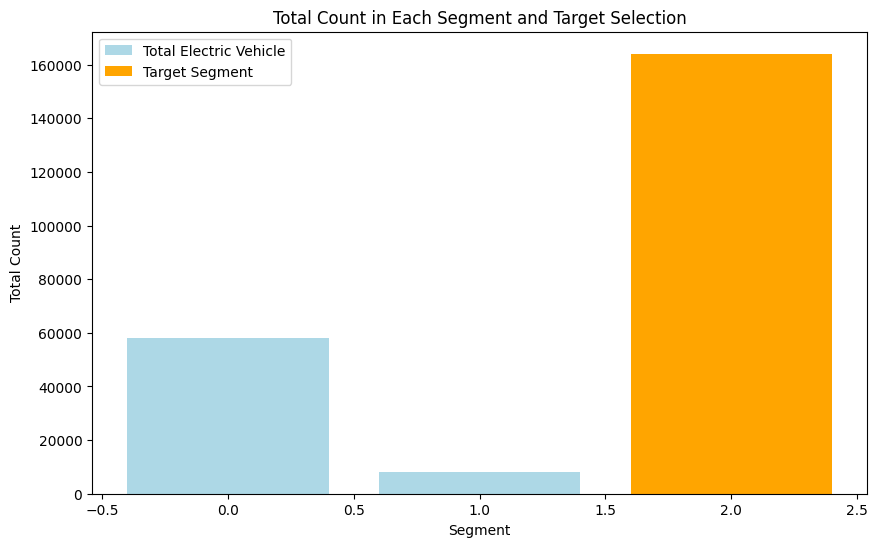

In [383]:
# Bar plot to visualize target selection
plt.figure(figsize=(10, 6))
plt.bar(segment_profile.index, segment_profile['Total Electric Vehicle'], color='lightblue', label='Total Electric Vehicle')

# Highlight the target segment
plt.bar(target_segment, segment_profile.loc[target_segment, 'Total Electric Vehicle'], color='orange', label='Target Segment')

plt.title('Total Count in Each Segment and Target Selection')
plt.xlabel('Segment')
plt.ylabel('Total Count')
plt.legend()
plt.show()


In [384]:
display(df)

,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total,EV to Non-EV Ratio,Segment
0,Andaman & Nicobar Island,162.0,146945.0,147107.0,0.001102,1
2,Arunachal Pradesh,20.0,252965.0,252985.0,0.000079,1
3,Assam,64766.0,4677053.0,4741819.0,0.013848,1
4,Bihar,83335.0,10407078.0,10490413.0,0.008008,0
5,Chandigarh,2812.0,746881.0,749693.0,0.003765,1
6,Chhattisgarh,20966.0,6836200.0,6857166.0,0.003067,1
7,Delhi,156393.0,7685600.0,7841993.0,0.020349,0
8,Goa,3870.0,1071570.0,1075440.0,0.003612,1
9,Gujarat,45272.0,20605484.0,20650756.0,0.002197,0
10,Haryana,37035.0,10778270.0,10815305.0,0.003436,0


In [385]:
selected_rows = df[df['Segment'] == 2]
display(selected_rows)

,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total,EV to Non-EV Ratio,Segment
14,Karnataka,120532.0,26870303.0,26990835.0,0.004486,2
19,Maharashtra,116646.0,31058990.0,31175636.0,0.003756,2
29,Tamil Nadu,82051.0,29842376.0,29924427.0,0.002749,2
34,Uttar Pradesh,337180.0,40092490.0,40429670.0,0.008410,2
